# Prediction using decision tree algorithm 
Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
Dataset : https://bit.ly/3kXTdox
author: ch sai gowtham

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# importing the data


In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape
#there are 150 data points and 6 columns

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()
#there are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='Species', ylabel='count'>

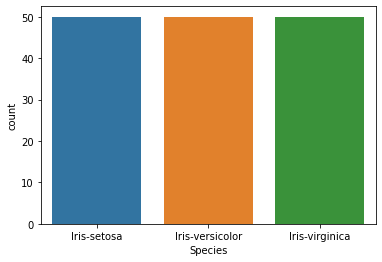

In [7]:
sns.countplot(x=iris['Species'],data = iris)
# all the classes have equally distributed data

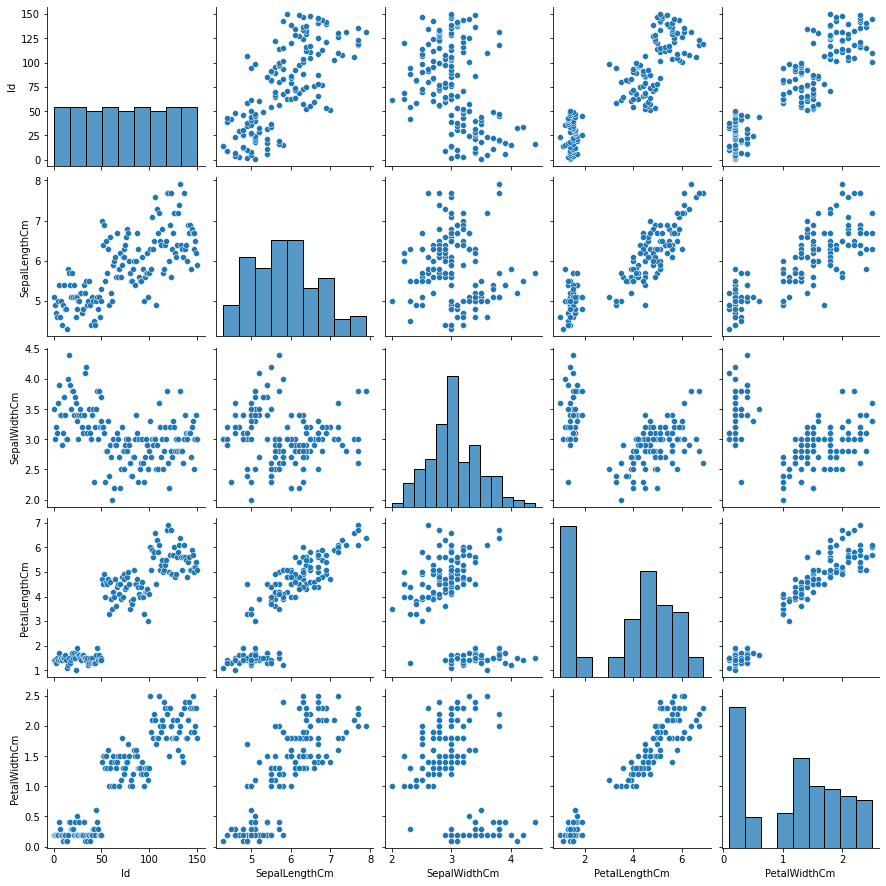

In [8]:
 sns.pairplot(iris)

# Train test and splitting the data

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X = iris.drop(columns = ['Id','Species'])
y= iris['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)


# Training a decision tree model

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Predictions using the model

In [12]:
predict = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [15]:
print(confusion_matrix(y_test,predict))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Decision tree visualization

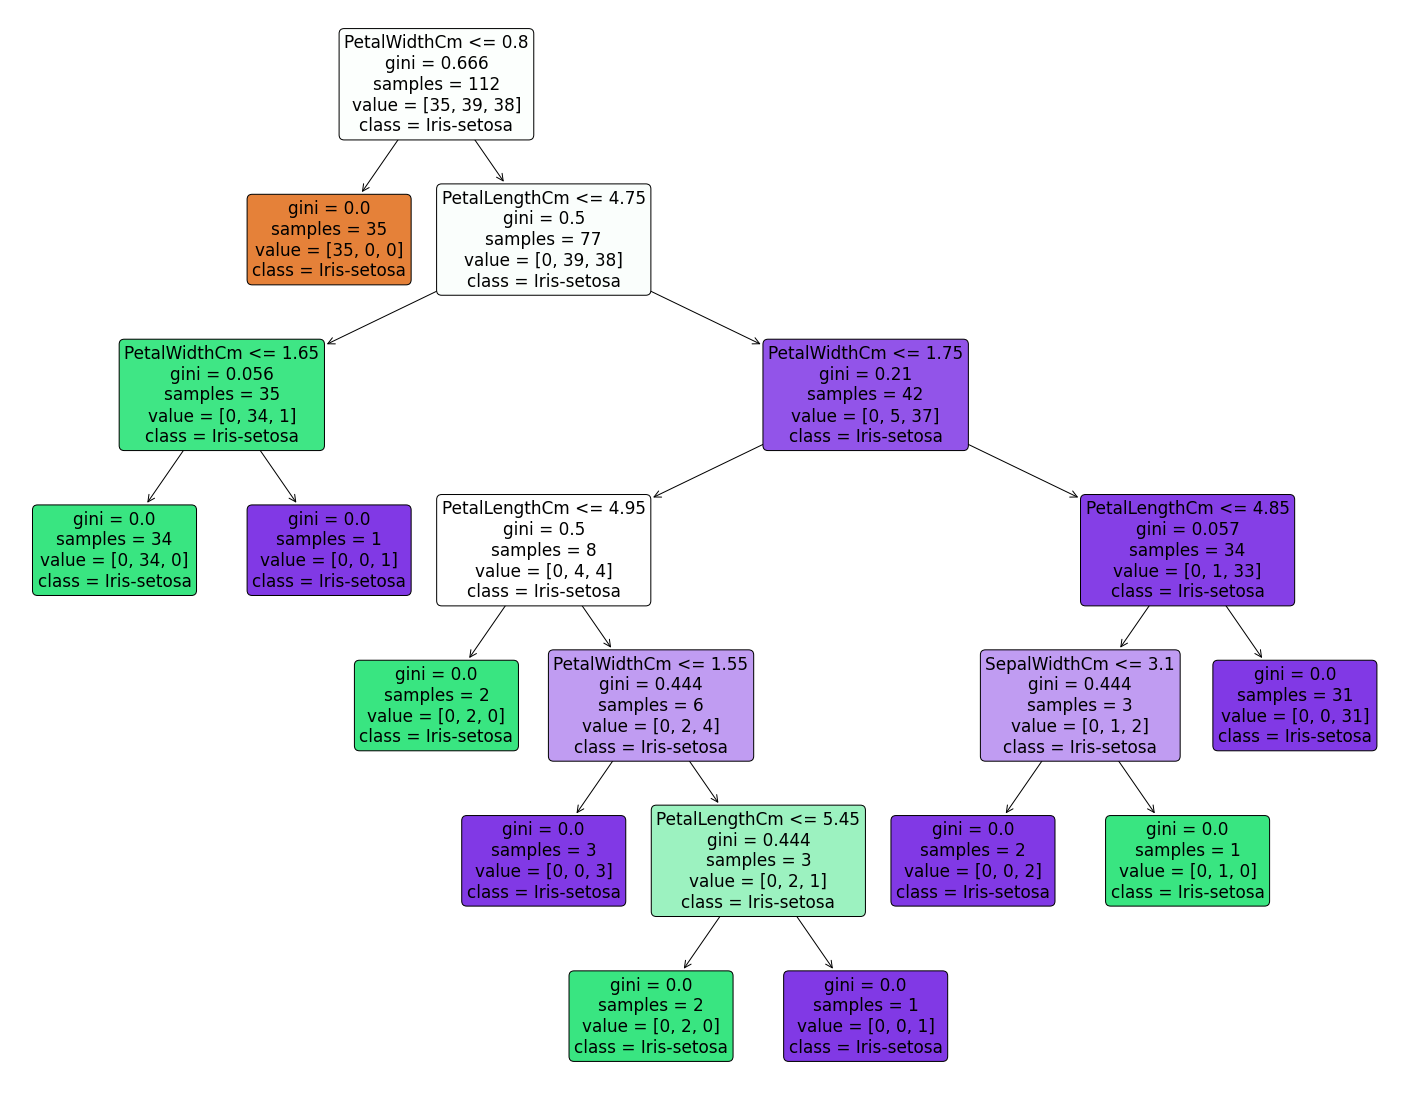

In [16]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,  
                   feature_names=X.keys(),
                   class_names=iris.Species,
                   filled=True,
                            rounded=True)

In [17]:
clf.feature_importances_
#how important are the feautres for the decision a tree makes

array([0.        , 0.01787567, 0.41581891, 0.56630542])

# Predictions on new data

In [18]:
data = [[6.5,3.1,4.3,1.2]]
clf.predict(data)

array(['Iris-versicolor'], dtype=object)